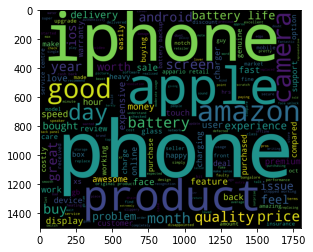

In [1]:
# Below program is executed in python 3.5 environment 
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud

iphone_reviews=[]
#iphone_reviews=[]
for i in range(1,20):
  ip=[]  
  url="https://www.amazon.in/Apple-iPhone-X-64GB-Silver/product-reviews/B0711T2L8K/ref=cm_cr_arp_d_paging_btm_next_2?showViewpoints=1&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
  iphone_reviews=iphone_reviews+ip 
  
with open("iphone.txt","w",encoding = "utf-8") as output:
    output.write(str(iphone_reviews))
import os
os.getcwd()

ip_string_join = " ".join(iphone_reviews)

ip_string_join = re.sub("[^A-Za-z" "]+"," ",ip_string_join).lower()
ip_string_join = re.sub("[0-9" "]+"," ",ip_string_join)
ip_string_join = ip_string_join.split(" ")

with open("C:/Users/hp/Downloads/stop.txt","r") as sw:
    stopwords = sw.read()
    
ip_string_words = [i for i in ip_string_join if i not in stopwords]
ip_string_words_join = " ".join(ip_string_words)
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(ip_string_words_join)
plt.imshow(wordcloud_stw)


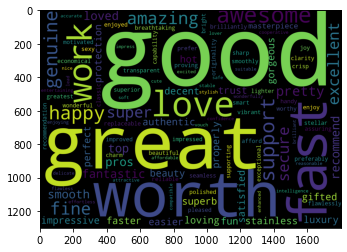

In [2]:
with open("C:/Users/hp/Downloads/positive-words.txt","r") as pw:
        positive_words = pw.read()
positive_words = positive_words.split("\n")
positive_words = positive_words[36:]
 
ip_string_posw = " ".join([w for w in ip_string_words if w in positive_words])
wordcloud_pos = WordCloud(
              background_color = 'black',
                width = 1800,
                height = 1300
                ).generate(ip_string_posw)
plt.imshow(wordcloud_pos)

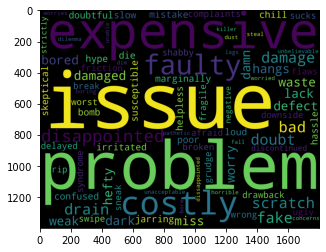

In [3]:
#with open("D:\negative.txt","r") as pw:
     # negative words  Choose path for -ve words stored in system
with open("C:/Users/hp/Downloads/negative-words.txt") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]

# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_string_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)


In [4]:
import pandas as pd

In [5]:
# Sentiment analysis
afinn = pd.read_csv("C:/Users/hp/Downloads/Affin.csv", encoding='latin-1')
afinn.shape

(2477, 2)

In [6]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [7]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [8]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20, affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [9]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(iphone_reviews))
sentences[10:25]

["Considering the XR is now priced higher than X. XS is only marginally better, and didn't feel it was worth the extra 30K.- Even after a year of being on the market, this phone is an absolute beast in terms of performance, especially after iOS 12.- The Camera is a beauty.",
 "You can't compare with DSLRs, but it is right up there with OnePlus and Google phones.- Looks exactly like the XS, and doesn't even have the S badging.",
 'So no one will be the wiser.Cons:- The delivery was a bit of a hassle.',
 'I had opted for One Day Delivery, at my work address.',
 'The agent reached at 7:30 in the morning, when I was obviously not at work.',
 'He did say he will come later in the afternoon.',
 'However, received the phone a day later.- The phone is extremely slippery.',
 'Invest in a good case, front screen protector and a rear glass protector- Such expensive phones should come with 128GB of storage as base, instead of 64GB.',
 'If you record 4K videos, it will eat up your storage really qu

In [10]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,\n\n I purchased iphone X on 26th Oct'18 and ...
1,"When i received the product, it was already op..."
2,"Within two days, it started giving me issue wi..."
3,I again contacted Amazon through app but i was...
4,"After talking to Apple representative, i only ..."
...,...
296,Amazon Delivered in One-day.
297,Item is worth for the money.
298,I got it in good deal with amazon.
299,"Picture quality, portrait pics are awesome eve..."


In [11]:
import spacy # language models

In [12]:
# Custom function :score each word in a sentence in lemmatised form, 
# but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None) -> float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [13]:
# test that it works
calculate_sentiment(text = 'bad')

-3

In [14]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [15]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    13
1    29
2    13
3    13
4    32
5    20
6    34
7    34
8    10
9    33
Name: word_count, dtype: int64

In [16]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
56,Now its been almost 1 month that i am using th...,10,35
65,Battery backup might not be the best but its n...,10,63
214,I gifted this to my brother he loved it.. the ...,10,17
116,If u dont have any grudge against apple (many ...,11,63
149,Own Iphone x over a month now and i’m so supe...,12,89
176,The phone has discontinued and is not worth no...,15,164
254,It sounds fishy\n\n \n\n Great product....fac...,15,55
221,Iam have been waited for my dream phone 1 yr l...,18,86
50,Thanks Amazon- The minute you hold the phone i...,19,190
47,"Best phone ever , camera is best , i love iPho...",19,198


In [17]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    301.000000
mean       1.574751
std        3.534387
min       -5.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       19.000000
Name: sentiment_value, dtype: float64

In [18]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head(20)

,sentence,sentiment_value,word_count
0,\n\n I purchased iphone X on 26th Oct'18 and ...,0,13
1,"When i received the product, it was already op...",0,29
2,"Within two days, it started giving me issue wi...",0,13
6,This is my 3rd iPhone after iPhone 4S and iPho...,0,34
8,"With exchange offer, it cost me a little over ...",0,10
12,So no one will be the wiser.Cons:- The deliver...,-1,15
13,"I had opted for One Day Delivery, at my work a...",0,11
15,He did say he will come later in the afternoon.,0,10
16,"However, received the phone a day later.- The ...",0,12
18,"If you record 4K videos, it will eat up your s...",0,23


In [19]:
sent_df[sent_df['sentiment_value']>=2].head(20)

,sentence,sentiment_value,word_count
3,I again contacted Amazon through app but i was...,2,13
4,"After talking to Apple representative, i only ...",2,32
5,"After purchasing a phone worth up to 90k, i ha...",3,20
9,"For the price (and that price only), this make...",5,33
10,Considering the XR is now priced higher than X...,2,51
11,"You can't compare with DSLRs, but it is right ...",2,28
17,"Invest in a good case, front screen protector ...",3,27
19,"If you have the money, go for XS Max.- The bat...",3,14
22,Best picture Nd photo clarityBattery and the p...,9,16
23,Using last 2 months\n\n \n\n Thanks to Appari...,5,24


In [20]:
sent_df['index']=range(0,len(sent_df))

C:\Users\Paresh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


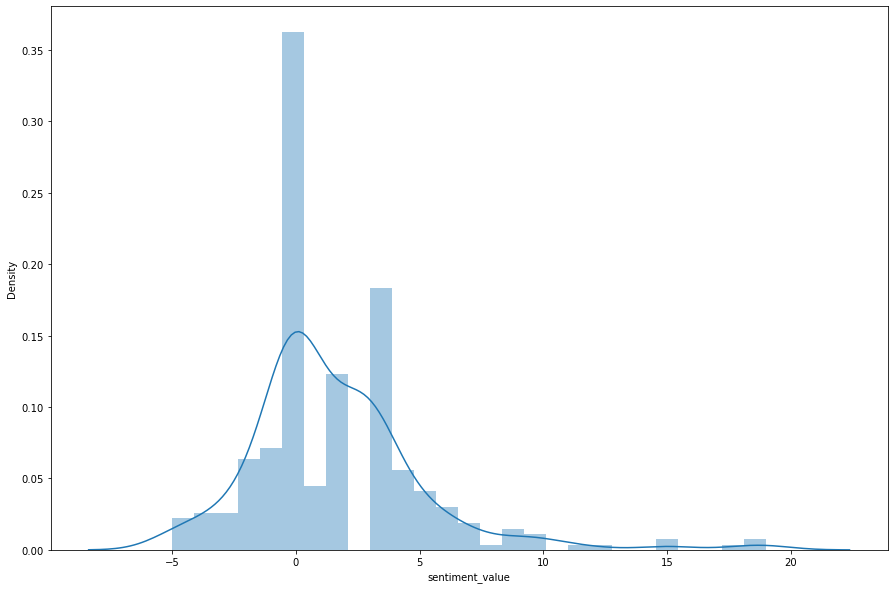

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.distplot(sent_df['sentiment_value']);

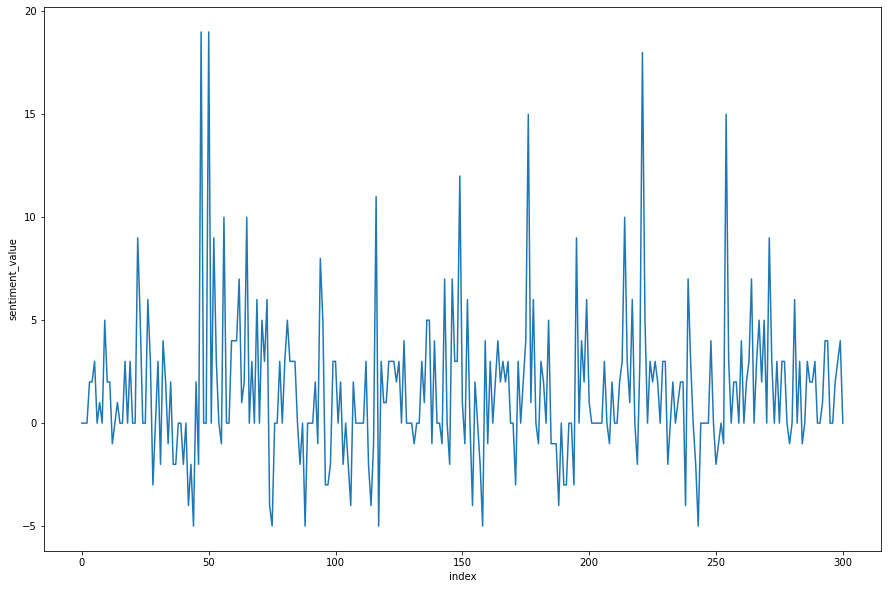

In [22]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df);

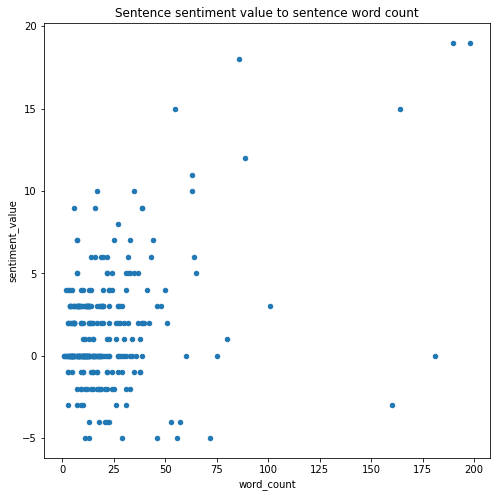

In [23]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count');